In [24]:
import sys
sys.path
sys.path.append('/home/juanp.montoya/NeuralNetworks/Final_Project/final-project-landandbuildingsatimg-ccny/')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

from skimage import io
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import PIL
import logging    # first of all import the module

from src.data.GeoUtilities import MaskConverter

os.getcwd()

'/home/juanp.montoya/NeuralNetworks/Final_Project/final-project-landandbuildingsatimg-ccny/data/raw/input'

In [4]:
os.chdir('../../data/raw/input')
os.getcwd()

'/home/juanp.montoya/NeuralNetworks/Final_Project/final-project-landandbuildingsatimg-ccny/data/raw/input'

In [6]:
#now we will Create and configure logger 
logging.basicConfig(filename="std.log", 
					format='%(asctime)s - %(levelname)s - %(message)s', 
					filemode='a') 

#Let us Create an object 
logger=logging.getLogger() 

#Now we are going to Set the threshold of logger to DEBUG 
logger.setLevel(logging.DEBUG) 

#some messages to test

for i in range(4):
    logger.info(f'hi {i}')
# logger.debug("This is just a harmless debug message") 
# logger.info("This is just an information for you") 
# logger.warning("OOPS!!!Its a Warning") 
# logger.error("Have you try to divide a number by zero") 
# logger.critical("The Internet is not working....") 

In [5]:
nRowsRead = 1000 
df1 = pd.read_csv('class_dict.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'class_dict.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7 rows and 4 columns


In [5]:
nRowsRead = None 
df2 = pd.read_csv('metadata.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'metadata.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1146 rows and 4 columns


In [25]:
img_height/2/2


NameError: name 'img_height' is not defined

In [119]:
512.0/(2**6)

8.0

In [26]:
img_height = 2448
img_width = 2448

In [8]:
# df=pd.read_csv(r".\train.csv")
datagen=ImageDataGenerator(rescale=1./255)


In [186]:
train_generator = datagen.flow_from_dataframe(dataframe=df2.loc[df2['split'] == 'train'], 
                                            directory="", 
                                            x_col="mask_path", 
                                            y_col="mask_path", 
                                            class_mode=None,
                                            target_size=(img_height,img_width), 
                                            batch_size=32)

Found 803 validated image filenames.


In [187]:
x, y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

TypeError: 'DataFrameIterator' object is not callable

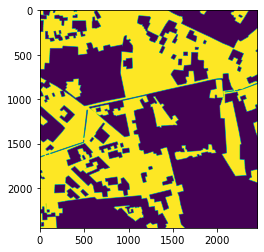

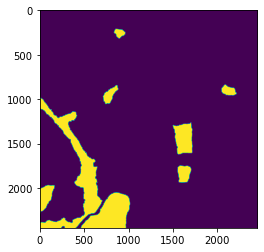

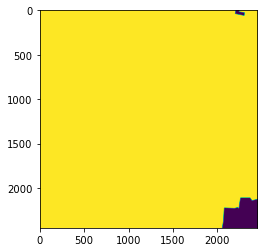

In [165]:
x = train_generator.next()
for i in range(3):
    image = x[i,:,:,0]
    plt.imshow(image)
    plt.show()

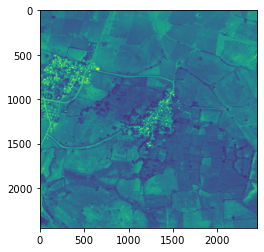

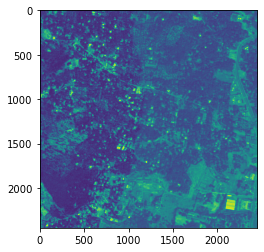

In [157]:
x = train_generator.next()
for i in range(0,2):
    image = x[i,:,:,0]
    plt.imshow(image)
    plt.show()

In [61]:
y.shape

(2448, 2448, 3)

In [83]:
s = train_generator.next()

In [112]:
x.shape

(2448, 2448, 3)

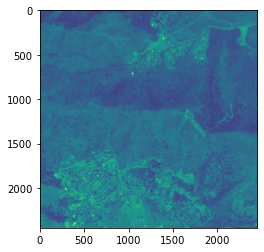

In [88]:
image = s[0,:,:,0]
plt.imshow(image)
plt.show()

In [113]:
x, h, w, c = train_generator.next()

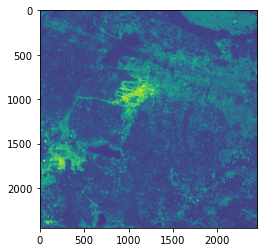

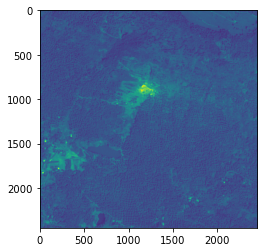

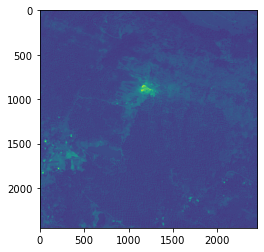

In [117]:
for i in range(0,3):
    image = x[:,:,i]
    plt.imshow(image)
    plt.show()

# Splitting

In [133]:
def split_image(image3, tile_size):
    image_shape = tf.shape(image3)
    tile_rows = tf.reshape(image3, [image_shape[0], -1, tile_size[1], image_shape[2]])
    serial_tiles = tf.transpose(tile_rows, [1, 0, 2, 3])
    return tf.reshape(serial_tiles, [-1, tile_size[1], tile_size[0], image_shape[2]])

def unsplit_image(tiles4, image_shape):
    tile_width = tf.shape(tiles4)[1]
    serialized_tiles = tf.reshape(tiles4, [-1, image_shape[0], tile_width, image_shape[2]])
    rowwise_tiles = tf.transpose(serialized_tiles, [1, 0, 2, 3])
    return tf.reshape(rowwise_tiles, [image_shape[0], image_shape[1], image_shape[2]])

In [161]:
tile_size = int(img_height/4)
tile_size

612

In [167]:
tiles = split_image(x[0,:,:,:], [tile_size, tile_size])

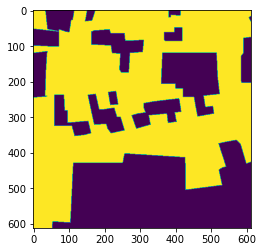

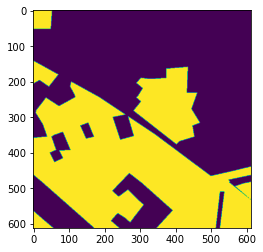

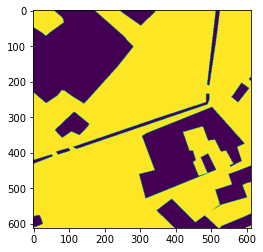

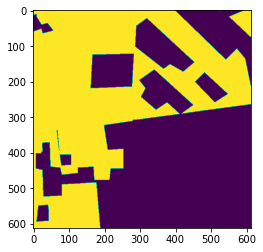

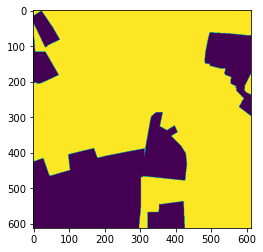

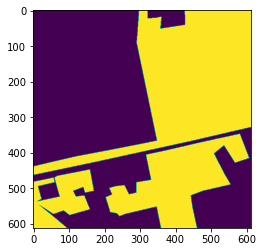

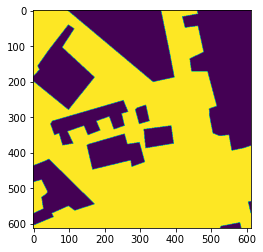

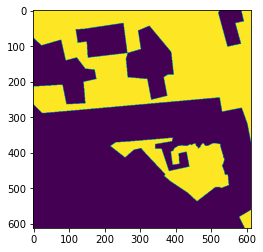

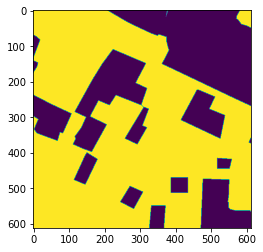

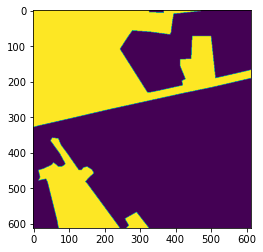

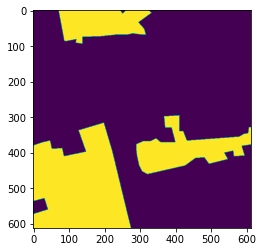

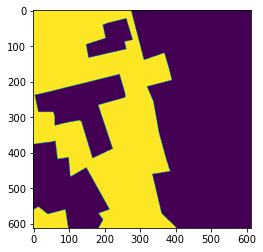

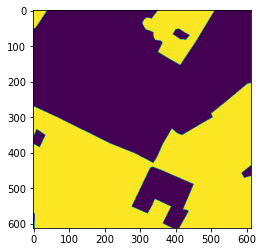

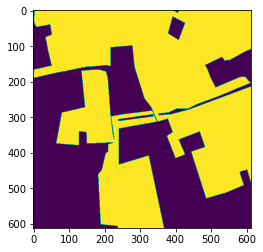

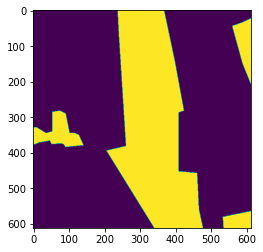

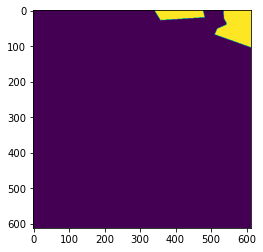

In [169]:
tiles.shape
for i in range(tiles.shape[0]):
    image = tiles[i,:,:,0]
    plt.imshow(image)
    plt.show()

In [141]:
recon = unsplit_image(tiles, tf.shape(x))


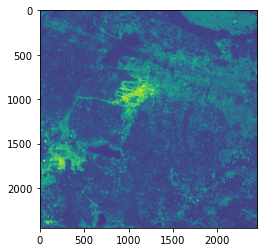

In [143]:
image = recon[:,:,0]
plt.imshow(image)
plt.show()

In [144]:
tiles.shape


TensorShape([16, 612, 612, 3])

# Save Image Tiles

In [147]:
tf.keras.preprocessing.image.save_img('../Cropping_Test/im_1.jpg', tiles[0,:,:,:], data_format=None, file_format=None, scale=True)

JPEG
(612, 612)
RGB


(612, 612, 3)

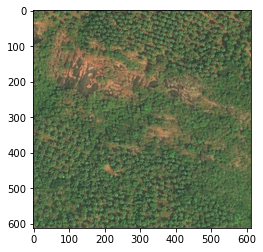

In [183]:
image = PIL.Image.open('../Cropping_Test/im_1.jpg')
print(image.format)
print(image.size)
print(image.mode)
# show the image
plt.imshow(image)
np.asarray(image).shape

In [43]:
df2

image_id  split        sat_image_path              mask_path
0       100694  train  train/100694_sat.jpg  train/100694_mask.png
1       102122  train  train/102122_sat.jpg  train/102122_mask.png
2        10233  train   train/10233_sat.jpg   train/10233_mask.png
3       103665  train  train/103665_sat.jpg  train/103665_mask.png
4       103730  train  train/103730_sat.jpg  train/103730_mask.png
...        ...    ...                   ...                    ...
1141    979233   test   test/979233_sat.jpg                    NaN
1142    983689   test   test/983689_sat.jpg                    NaN
1143    988205   test   test/988205_sat.jpg                    NaN
1144    989953   test   test/989953_sat.jpg                    NaN
1145    999380   test   test/999380_sat.jpg                    NaN

[1146 rows x 4 columns]

# Pipeline to read and transfer to numpy array

In [27]:
data_gen = ImageDataGenerator(rescale = 1. /255)
data_gen2 = ImageDataGenerator()

batch_size = 50

data_generator = data_gen.flow_from_dataframe(dataframe=df2.loc[df2['split'] == 'train'], 
                                            directory="", 
                                            x_col="sat_image_path", 
                                            y_col="mask_path", 
                                            class_mode=None,
                                            seed = 0,
                                            target_size=(img_height,img_width), 
                                            batch_size=batch_size)

mask_generator = data_gen2.flow_from_dataframe(dataframe=df2.loc[df2['split'] == 'train'], 
                                            directory="", 
                                            x_col="mask_path", 
                                            y_col="mask_path", 
                                            class_mode=None,
                                            seed = 0,
                                            target_size=(img_height,img_width), 
                                            batch_size=batch_size)

# data_generator = datagen.flow_from_directory(
#     data_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical')


Found 803 validated image filenames.
Found 803 validated image filenames.


In [10]:
data_generator[0].shape

(50, 2448, 2448, 3)

In [29]:
data_list = []
batch_index = 0

while batch_index <= data_generator.batch_index:
    data = data_generator.next()
    data_list.append(data[0])
    batch_index = batch_index + 1
    print(batch_index, data_generator.batch_index)

# now, data_array is the numeric data of whole images
data_array = np.asarray(data_list)

1 1
2 2


KeyboardInterrupt: 

In [82]:
tile_size = int(img_height/np.sqrt(4))
print(tile_size)

1224


612


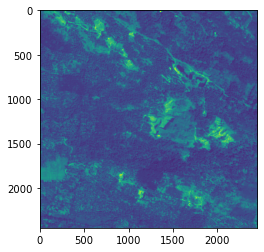

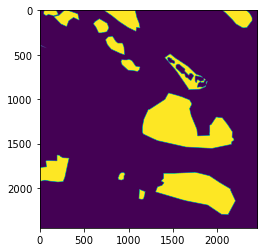

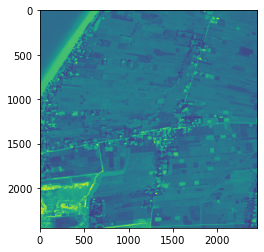

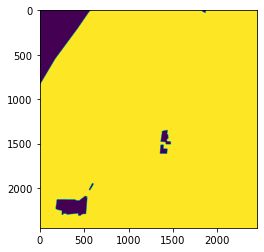

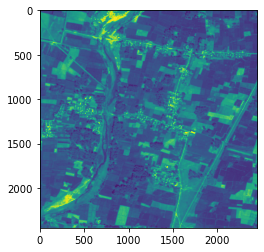

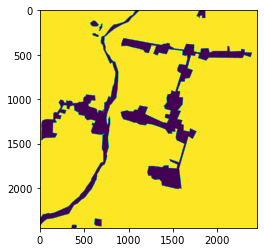

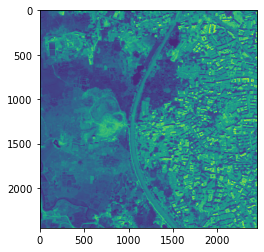

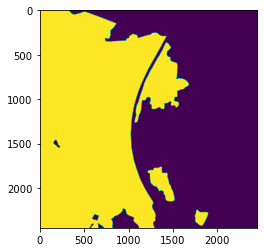

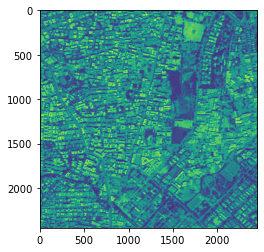

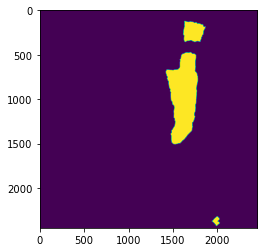

In [66]:
tile_size = int(img_height/np.sqrt(split))
print(tile_size)

batch = 0
x = data_generator[batch]
m = mask_generator[batch]
for i in range(x.shape[0]):
    image = x[i,:,:,0]
    mask = m[i,:,:,0]
    plt.imshow(image)
    plt.figure()
    plt.imshow(mask)
    plt.show()

In [31]:
def split_image(image3, tile_size):
    image_shape = tf.shape(image3)
    tile_rows = tf.reshape(image3, [image_shape[0], -1, tile_size[1], image_shape[2]])
    serial_tiles = tf.transpose(tile_rows, [1, 0, 2, 3])
    return tf.reshape(serial_tiles, [-1, tile_size[1], tile_size[0], image_shape[2]])

def unsplit_image(tiles4, image_shape):
    tile_width = tf.shape(tiles4)[1]
    serialized_tiles = tf.reshape(tiles4, [-1, image_shape[0], tile_width, image_shape[2]])
    rowwise_tiles = tf.transpose(serialized_tiles, [1, 0, 2, 3])
    return tf.reshape(rowwise_tiles, [image_shape[0], image_shape[1], image_shape[2]])

In [138]:
tiles = split_image(x[3,:,:,:], [tile_size, tile_size])

In [143]:
tiles.numpy()

array([[[[0.10980393, 0.10588236, 0.08627451],
         [0.1137255 , 0.10196079, 0.06666667],
         [0.10196079, 0.07843138, 0.03137255],
         ...,
         [0.69803923, 0.627451  , 0.627451  ],
         [0.627451  , 0.56078434, 0.52156866],
         [0.3921569 , 0.34509805, 0.25882354]],

        [[0.07058824, 0.07058824, 0.03921569],
         [0.10588236, 0.09411766, 0.05882353],
         [0.09803922, 0.08235294, 0.03921569],
         ...,
         [0.74509805, 0.6901961 , 0.6784314 ],
         [0.57254905, 0.5254902 , 0.4784314 ],
         [0.43137258, 0.40000004, 0.31764707]],

        [[0.12941177, 0.13333334, 0.10196079],
         [0.0627451 , 0.06666667, 0.03529412],
         [0.13333334, 0.13725491, 0.10588236],
         ...,
         [0.7058824 , 0.6666667 , 0.6313726 ],
         [0.5647059 , 0.5372549 , 0.47450984],
         [0.44705886, 0.42352945, 0.3372549 ]],

        ...,

        [[0.1764706 , 0.21960786, 0.18823531],
         [0.20784315, 0.2509804 , 0.21960786]

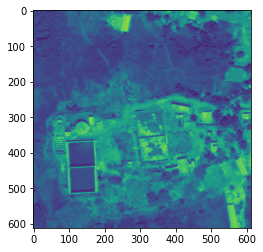

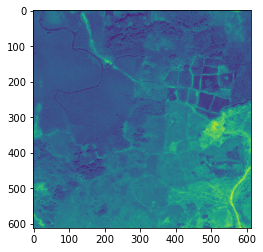

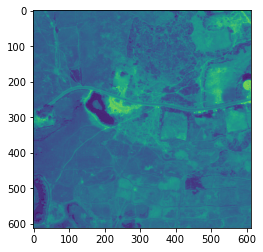

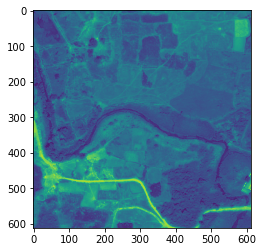

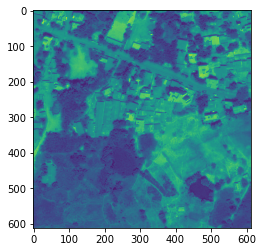

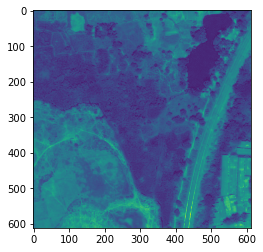

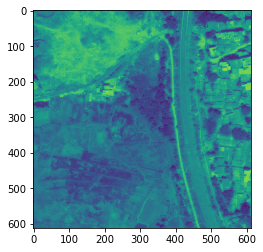

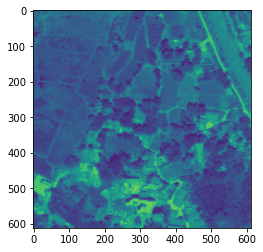

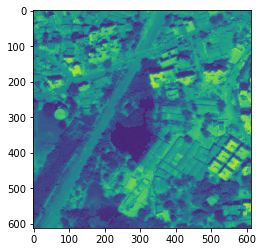

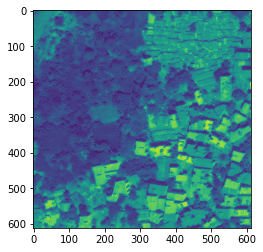

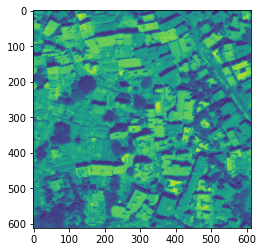

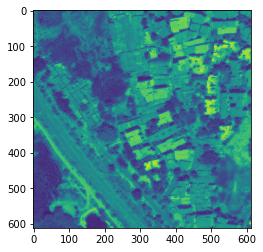

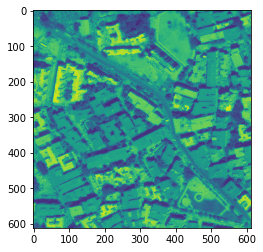

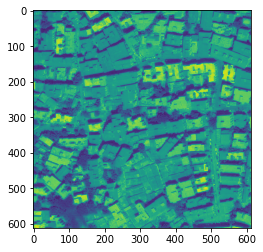

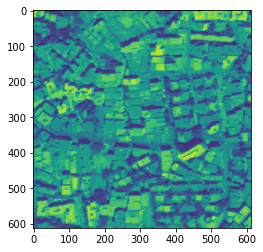

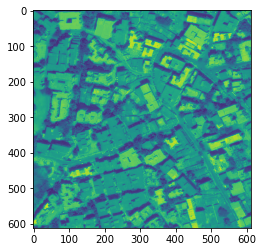

In [74]:
tiles.shape
for i in range(tiles.shape[0]):
    image = tiles[i,:,:,0]
    plt.imshow(image)
    plt.show()
    tf.keras.preprocessing.image.save_img('../Cropping_Test/im_1.jpg', tiles[0,:,:,:], data_format=None, file_format=None, scale=True)

In [30]:
def split_images(data_generator, mask_generator, split, batch_size, batch_n = None):
    tile_size = int(img_height/np.sqrt(split))
    print(f'Resulting image size: {tile_size} x {tile_size}')
    batch_index = 0
    if batch_n != None:
        while batch_index <= batch_n:
            x = data_generator.next()
            m = mask_generator.next()
            for i in range(batch_size):
                data_tiles = split_image(x[i,:,:,:], [tile_size, tile_size])
                mask_tiles = split_image(m[i,:,:,:], [tile_size, tile_size])
                for t in range(data_tiles.shape[0]):
                    tf.keras.preprocessing.image.save_img(f'../Cropping_Test/Train_Batch_{batch_index}_Image_{i}_Tile_{t}.png', 
                                                          data_tiles[t,:,:,:], data_format=None, file_format=None, scale=True)
                    tf.keras.preprocessing.image.save_img(f'../Cropping_Test/Mask_Batch_{batch_index}_Image_{i}_Tile_{t}.png', 
                                                          mask_tiles[t,:,:,:], data_format=None, file_format=None, scale=True)
            batch_index = batch_index + 1
    else:
        while batch_index <= data_generator.batch_index:
            x = data_generator.next()
            m = mask_generator.next()
            for i in range(batch_size):
                data_tiles = split_image(x[i,:,:,:], [tile_size, tile_size])
                mask_tiles = split_image(m[i,:,:,:], [tile_size, tile_size])
                for t in range(data_tiles.shape[0]):
                    tf.keras.preprocessing.image.save_img(f'../Cropping_Test/Train_Batch_{batch_index}_Image_{i}_Tile_{t}.png', 
                                                          data_tiles[t,:,:,:], data_format=None, file_format=None, scale=True)
                    tf.keras.preprocessing.image.save_img(f'../Cropping_Test/Mask_Batch_{batch_index}_Image_{i}_Tile_{t}.png', 
                                                          mask_tiles[t,:,:,:], data_format=None, file_format=None, scale=True)
            batch_index = batch_index + 1

In [95]:
split_images(data_generator, mask_generator, 4, batch_size, batch_n = 2)

Resulting image size: 1224 x 1224


# Mask to Labels

- urban_land         [0 ,255 ,255]    --> 1
- agriculture_land   [255 ,255 ,0]    --> 2   
- rangeland          [255 ,0 ,255]    --> 3
- forest_land        [0 ,255 ,0]      --> 4
- water              [0 ,0 ,255]      --> 5
- barren_land        [255 ,255 ,255]  --> 6
- unknown            [0 ,0 ,0]        --> 0

In [28]:
batch = 0
x = data_generator[batch]
m = mask_generator[batch]

In [6]:
im = np.array(PIL.Image.open('../../interim/Cropped/Data/Train_Batch_0_Image_1_Tile_1.png'))
ms = np.array(PIL.Image.open('../../interim/Cropped/Mask/Mask_Batch_0_Image_1_Tile_1.png'))

In [157]:
im.max()

1

In [53]:
f = 'dfd'

print(f'holi {f} holi{f}')
mask_s

holi dfd holidfd


TypeError: only size-1 arrays can be converted to Python scalars

(16, 612, 612, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

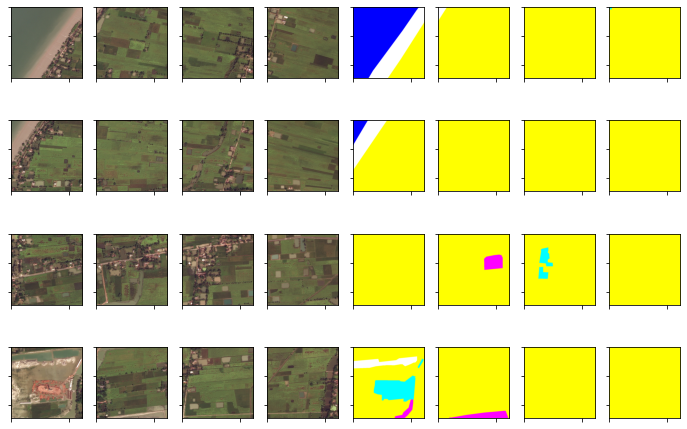

In [56]:
mask = m[1,:,:,:]
image = x[1,:,:,:]

split = 16
tile_size = int(img_height/np.sqrt(split))

im_slice = split_image(image, [tile_size, tile_size] )
mask_slice = split_image(mask, [tile_size, tile_size] )
print(im_slice.shape)

image_s = im_slice[0,:,:,:]
mask_s = mask_slice[0,:,:,:]

fig, axes = plt.subplots(4, 8, figsize=(12, 8))

k = 0
for i in range(4):
    for j in range(4):
        axes[j,i].imshow(im_slice[k,:,:,:])
        axes[j,i].set_yticklabels([])
        axes[j,i].set_xticklabels([])
        k = k+1

k = 0
for i in range(4,8):
    for j in range(4):
        axes[j,i].imshow(mask_slice[k,:,:,:])
        axes[j,i].set_yticklabels([])
        axes[j,i].set_xticklabels([])
        k = k+1
plt.savefig('SplitFig.png', dpi =300)
# ax.set_yticklabels([])
# ax.set_xticklabels([])
# plt.figure()
# plt.imshow(image)

# plt.figure()
# plt.imshow(im_slice[6,:,:,:])


# axes[0,1].imshow(mask_s[:,:,0])

# axes[1,0].imshow(image[:,:,:])

# axes[1,1].imshow(mask[:,:,0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


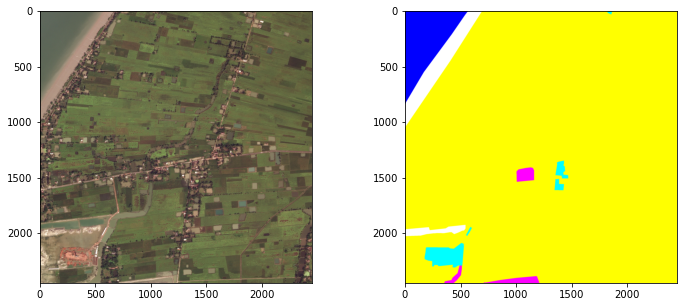

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(np.array(image))
axes[1].imshow(mask)
plt.savefig('UnSplitFig.png', dpi =300)


(16, 612, 612, 3)


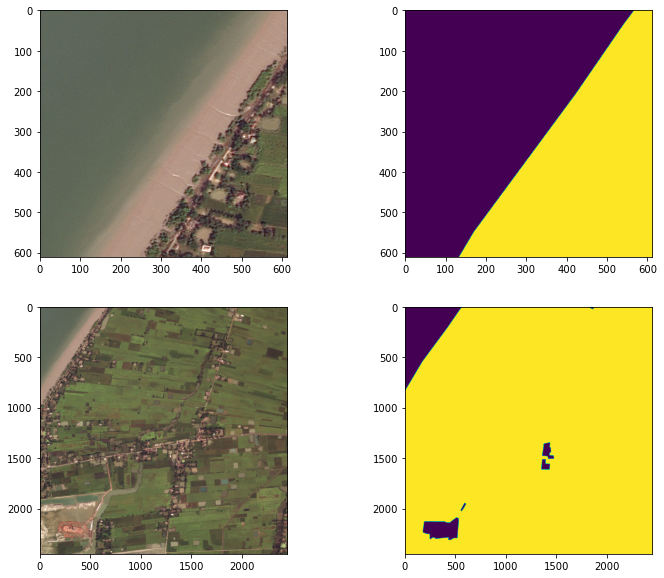

In [32]:
mask = m[1,:,:,:]
image = x[1,:,:,:]

split = 16
tile_size = int(img_height/np.sqrt(split))

im_slice = split_image(image, [tile_size, tile_size] )
mask_slice = split_image(mask, [tile_size, tile_size] )
print(im_slice.shape)

image_s = im_slice[0,:,:,:]
mask_s = mask_slice[0,:,:,:]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].imshow(image_s[:,:,:])

axes[0,1].imshow(mask_s[:,:,0])

axes[1,0].imshow(image[:,:,:])

axes[1,1].imshow(mask[:,:,0])


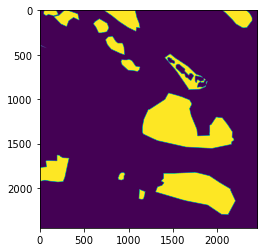

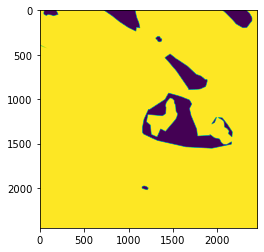

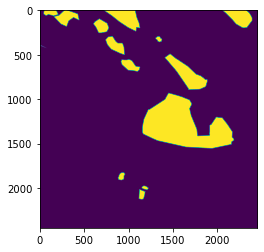

In [24]:
for i in range(m.shape[3]):
    mask = m[0,:,:,i]
    plt.figure()
    plt.imshow(mask)
    plt.show()

In [120]:
mask = m[1,:,:,:]
image = x[1,:,:,:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


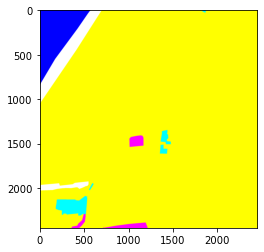

In [60]:
mask.shape
plt.imshow(mask)

In [61]:
label = MaskConverter.RGB_mapping_to_class(mask)
label.shape
# plt.imshow(mask)

(2448, 2448)

(array([[   0.,    0., 1338., ...,    0.,  836.,  274.],
        [   0.,    0., 1340., ...,    0.,  834.,  274.],
        [   0.,    0., 1342., ...,    0.,  832.,  274.],
        ...,
        [   0.,    0., 2448., ...,    0.,    0.,    0.],
        [   0.,    0., 2448., ...,    0.,    0.,    0.],
        [   0.,    0., 2448., ...,    0.,    0.,    0.]]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 2448 BarContainer objects>)

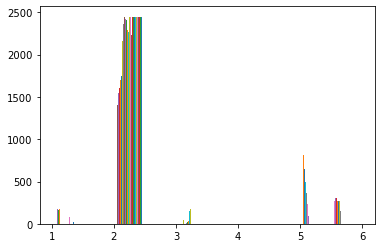

In [66]:
plt.hist(label)

In [77]:
# plt.imshow(label)
label.mean()

2.223320557798283

In [130]:
import cv2

cv2.imwrite(f'../../TEST1.png', label)

im = PIL.Image.open('../../TEST1.png')


In [97]:
import matplotlib
from matplotlib.colors import ListedColormap

def plot_label(mask, labels, col_dict):
	# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
	# col_dict={1:"blue",
	#           2:"red",
	#           3:"orange",
	#           4:"green",
	#           5:"yellow",
	#           6:"purple",
	#           7:"grey"}
	
	# We create a colormar from our list of colors
	cm = ListedColormap([col_dict[x] for x in col_dict.keys()])
	
	# Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
# 	labels = np.array(["Sea","City","Sand","Forest"])
    # labels = np.array(['urban_land','agriculture_land','rangeland','forest_land','water','barren_land','unknown'])
	len_lab = len(labels)
	
	
	# prepare normalizer
	## Prepare bins for the normalizer
	norm_bins = np.sort([*col_dict.keys()]) + 0.5
	norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
	print(norm_bins)
	## Make normalizer and formatter
	norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
	fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])
	
	# Plot our figure
	fig,ax = plt.subplots()
	im = ax.imshow(mask, cmap=cm, norm=norm)
	
	diff = norm_bins[1:] - norm_bins[:-1]
	tickz = norm_bins[:-1] + diff / 2
	cb = fig.colorbar(im, format=fmt, ticks=tickz)
	return ax

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


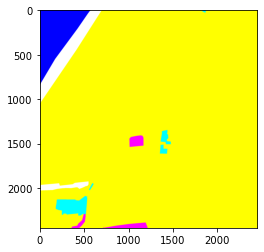

In [103]:
plt.imshow(mask)
plt.savefig('mask.png', dpi =300)


[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5]


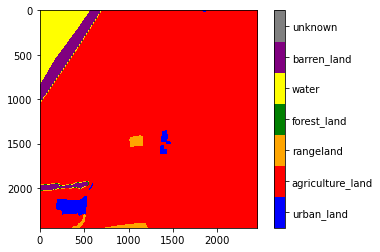

In [101]:
col_dict={1:"blue",
          2:"red",
          3:"orange",
          4:"green",
          5:"yellow",
          6:"purple",
          7:"grey"}
labels = np.array(['urban_land','agriculture_land','rangeland','forest_land','water','barren_land','unknown'])

plot_label(label, labels, col_dict)
plt.savefig('Label.png', dpi =300)



(2448, 2448)


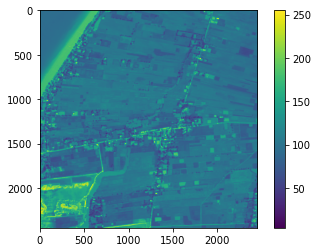

In [50]:
plt.figure()
plt.imshow(image[:,:,0])
plt.colorbar()
print(label.shape)

In [54]:
print('ff \n \n \n h')

ff 
 
 
 h


In [55]:
label.shape

(2448, 2448)

In [57]:
directory = '../../interim/Mask'

np.save(f'{directory}/Mask_Batch_.npy', label)
